In [4]:
from datasets import load_dataset

bkg_prompts = load_dataset("stas/openwebtext-10k",split='train')

In [2]:
# get background activations
import json
bkg_prompts=json.load(open('/mnt/data/users/Lang_Gao/proj/Attack_Mechanisms/data/taxonomy/benign_questions/alpaca_prompts.json'))
# bkg_prompts=[prompt['text'] for prompt in openwebdata]
# bkg_prompts=sorted(bkg_prompts,key=lambda x:len(x))

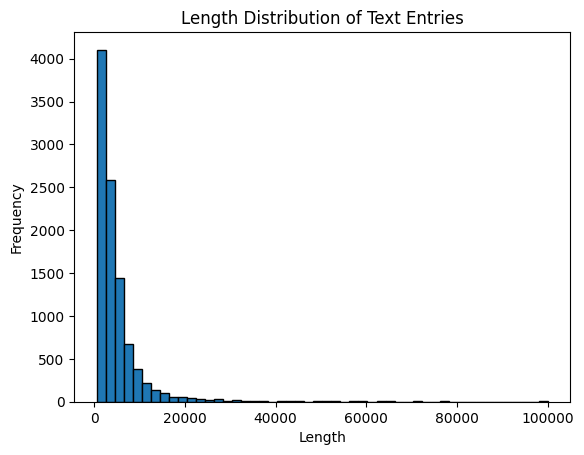

In [5]:
import matplotlib.pyplot as plt

# Calculate the length of each text entry
lengths = [len(text['text']) for text in bkg_prompts]

# Plot the histogram
plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Length Distribution of Text Entries')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [6]:
ranges = [(i, i + 100) for i in range(0, 4096, 100)]

In [7]:
import random
from tqdm import tqdm
# 设置每个区间抽取的样本数量
sample_size = 200

# 初始化一个空列表来存储样本
samples = []

# 遍历每个长度区间
for start, end in tqdm(ranges):
    # 找到在当前区间内的所有文本索引
    indices_in_range = [i for i, length in enumerate(lengths) if start <= length < end]
    
    # 如果当前区间内的文本数量少于样本数量，则使用所有文本
    if len(indices_in_range) < sample_size:
        samples.extend([bkg_prompts[i]['text'] for i in indices_in_range])
    else:
        # 随机抽取样本
        sampled_indices = random.sample(indices_in_range, sample_size)
        samples.extend([bkg_prompts[i]['text'] for i in sampled_indices])

# 打印样本数量
print(f"Total samples collected: {len(samples)}")

100%|██████████| 41/41 [00:00<00:00, 468.40it/s]

Total samples collected: 5711


In [8]:
# 先对 samples 列表按照长度进行排序
sorted_samples = sorted(samples, key=len)

# 保存排序后的 samples 列表到 JSON 文件中
import json
# json.dump(sorted_samples, open('alpaca_samples_lengthbalanced.json', 'w'), indent=2)

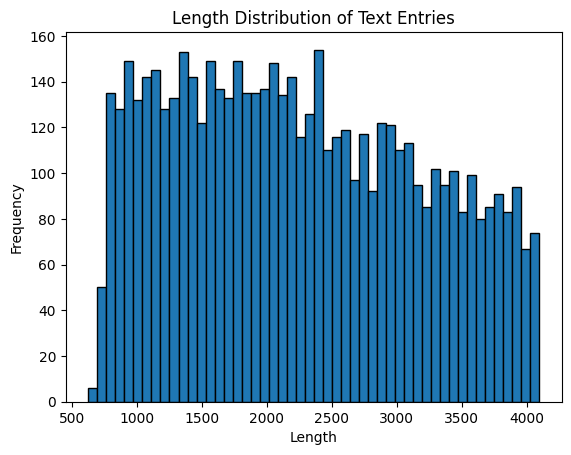

In [9]:
import matplotlib.pyplot as plt

# Calculate the length of each text entry
lengths = [len(text) for text in samples]

# Plot the histogram
plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Length Distribution of Text Entries')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()
